# Pattern Problem
## Linear Model

In [48]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [50]:
X_1, y_1 = make_classification(n_samples=300,
                               n_features=2, #독립변수의 수
                               n_redundant=0, #독립변수 중 다른 독립변수의 선형조합으로 나타나는 성분의 수
                               n_informative=2, #독립변수 중 종속변수와 상관관계가 있는 성분의 수
                               random_state=1,
                               n_clusters_per_class=1, #클래스 당 성분의 수
                               n_classes=2, # 종속변수의 클래스 수
                               class_sep=3,
                              )
X_1[:,1] = (X_1[:,0]+X_1[:,1])/2
rng = np.random.RandomState(2)
X_1 += 2*rng.uniform(size=X_1.shape)

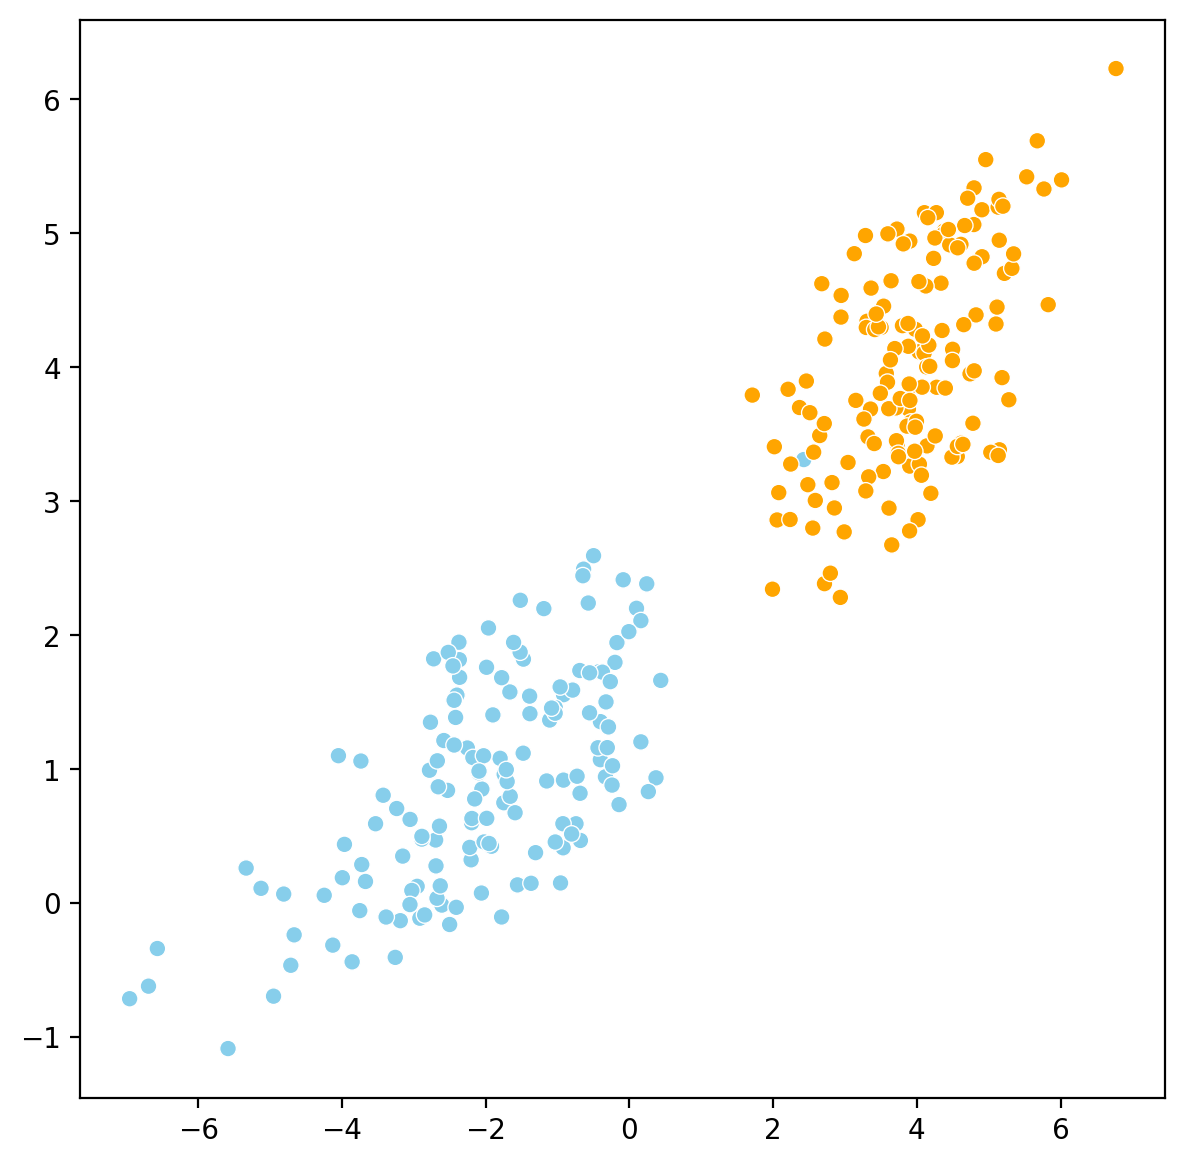

In [51]:
color_code = {0:'orange', 1:'skyblue'}

plt.figure(figsize=(7,7))
sns.scatterplot(x=X_1[:,0], y=X_1[:,1], c=[color_code.get(i) for i in y_1])
plt.show()

In [52]:
from sklearn.cluster import KMeans

In [53]:
km = KMeans(n_clusters=3, n_init=10, random_state=1)
km.fit(X_1)

centers = km.cluster_centers_
y_km = km.labels_

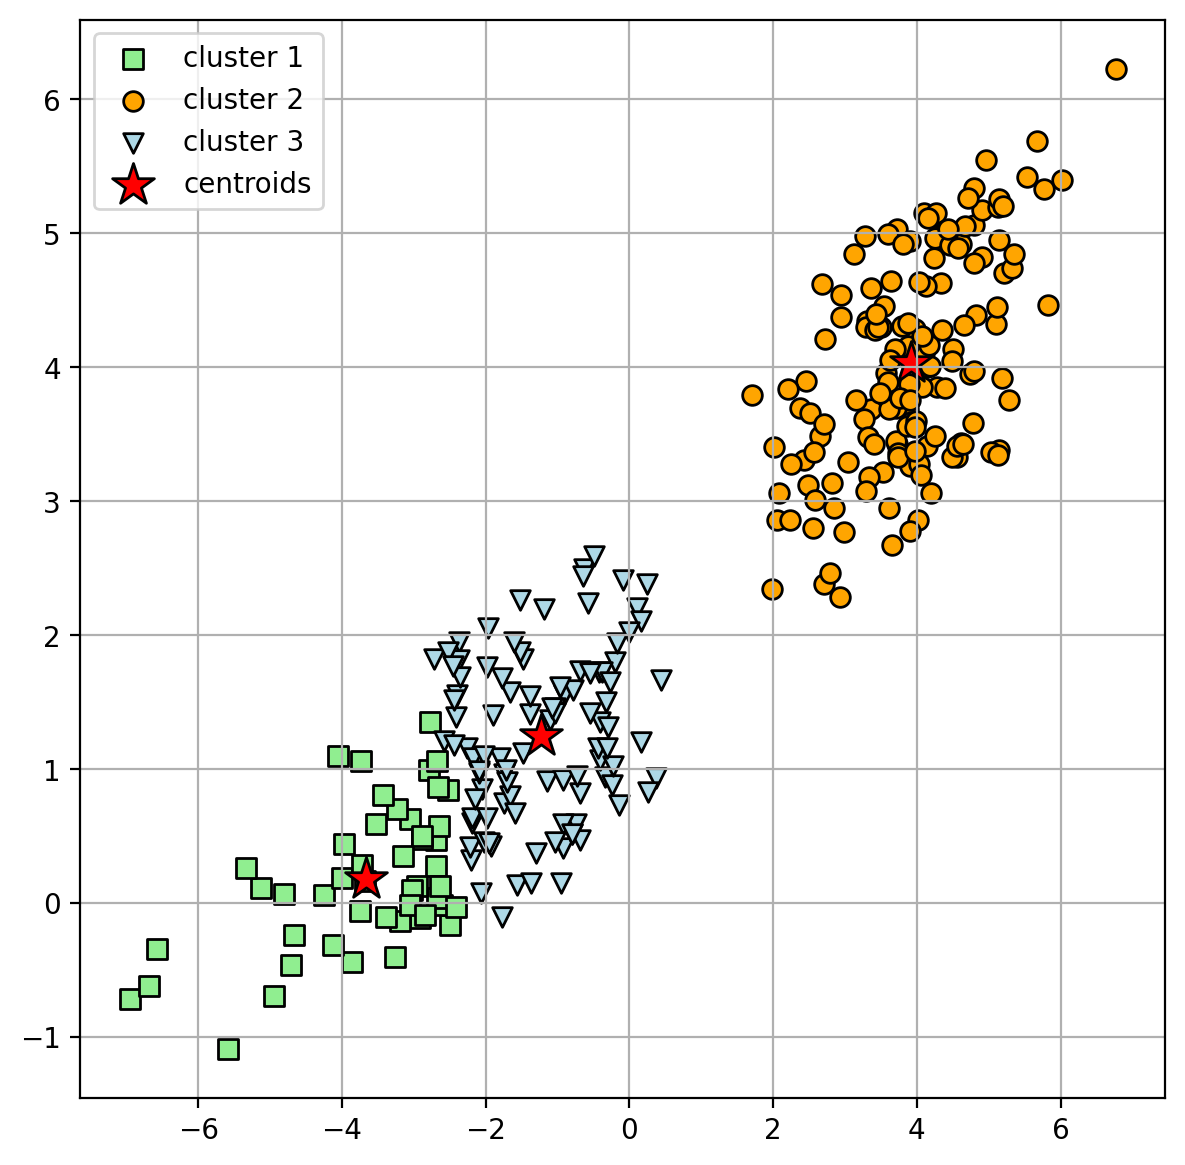

In [54]:
color_code = {0:'lightgreen', 1:'orange', 2:'lightblue'}
marker_code = {0:'s', 1:'o', 2:'v'}

plt.figure(figsize=(7,7))
for i in np.unique(y_km):
    plt.scatter(X_1[y_km == i, 0],
                X_1[y_km == i, 1],
                c = [color_code.get(i)],
                marker = marker_code.get(i),
                s = 50,
                edgecolors='k',
                label=f'cluster {i+1}',
               )

plt.scatter(centers[:,0],centers[:,1],
            s=250, marker="*",
            c='red', edgecolors='k',
            label='centroids'
           )
plt.legend(scatterpoints=1) #포인터 수
plt.grid()
plt.show()

### Elbow Method

In [55]:
distortions=[]
for i in range(1,11):
    km = KMeans(n_clusters=i, n_init=10, random_state=1)
    km.fit(X_1)
    distortions.append(km.inertia_)

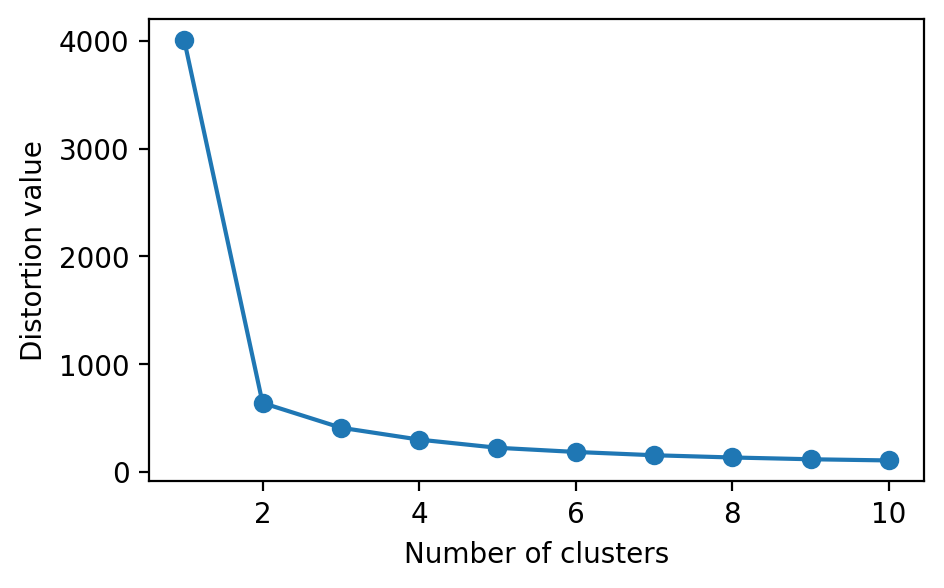

In [56]:
plt.figure(figsize=(5,3))
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion value')
plt.show()

In [57]:
km=KMeans(n_clusters=2, n_init=10, random_state=1)
km.fit(X_1)
y1_km = km.labels_

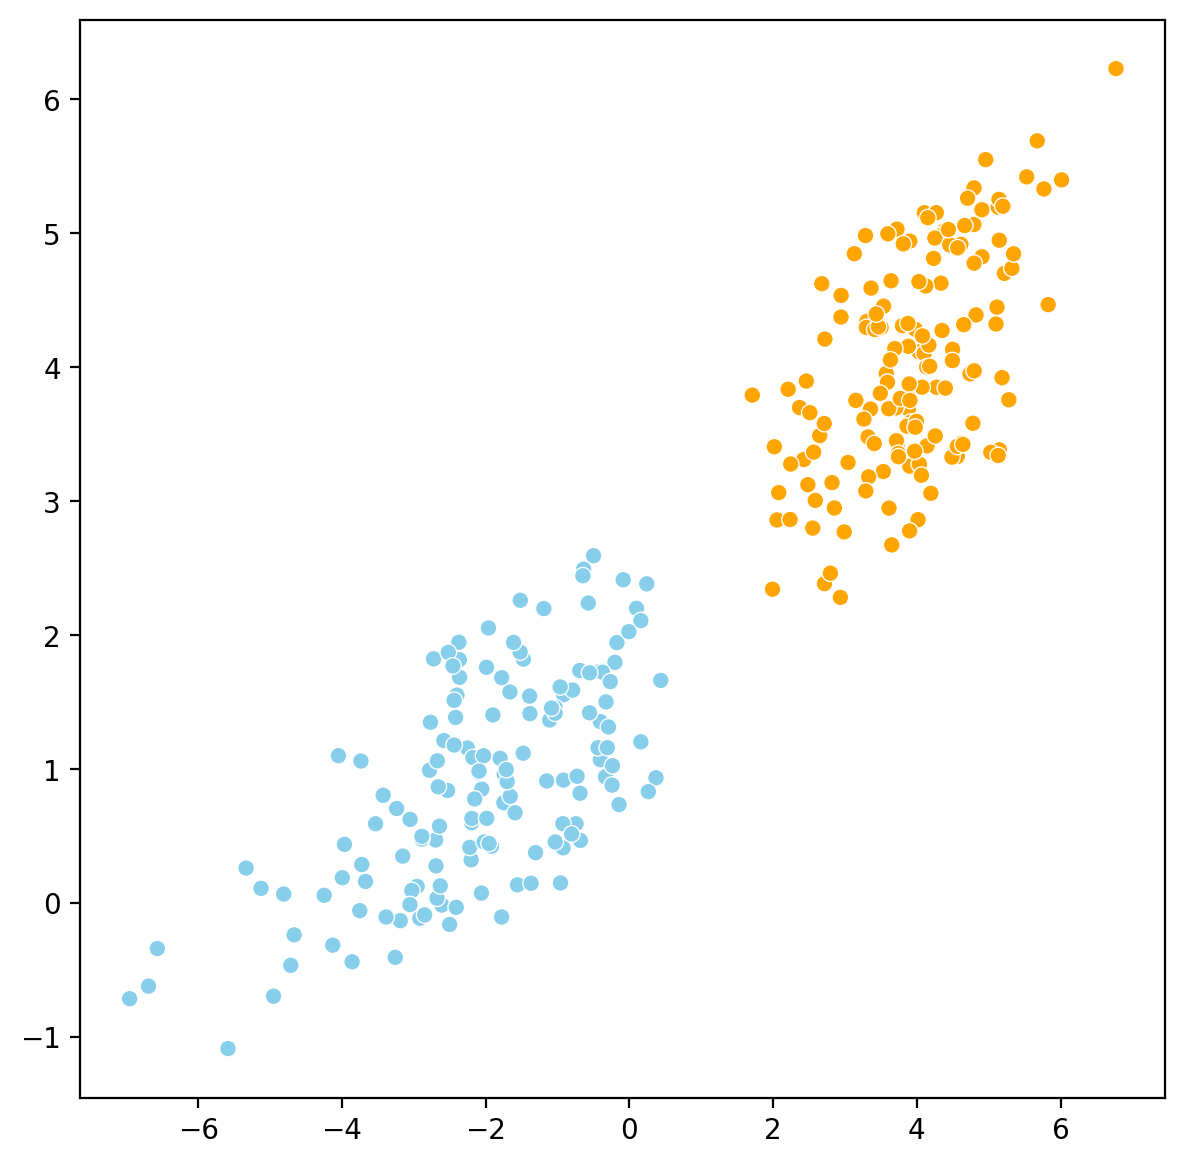

In [58]:
color_code = {0:'orange', 1:'skyblue'}
plt.figure(figsize=(7,7))
sns.scatterplot(x=X_1[:,0], y=X_1[:,1], c=[color_code.get(i) for i in y1_km])
plt.show()

### PCA

$
\textbf{X} : \text{mean centered data}
$

In [73]:
mX = X_1.copy()
for i in range(mX.shape[1]):
    mX[:,i] = mX[:,i] - np.mean(mX[:,i])
mX[:5,:]

array([[-1.89469987, -2.06475507],
       [ 4.24382367,  2.22457965],
       [-3.16800536, -1.87746718],
       [-3.39020401, -1.09129996],
       [-3.16395653, -1.84577034]])

In [74]:
mX.shape

(300, 2)

$
Cov[X,Y] = \begin{bmatrix} 
    Var[X] & Cov[X,Y] \\
    Cov[Y,X] & Var[Y]
    \end{bmatrix} \\
\text{Cov}(X, Y) = E[XY] - E[X]E[Y]
$

In [83]:
A = np.cov(mX.T)
A

array([[10.32543426,  5.22917238],
       [ 5.22917238,  3.06569127]])

$
\textbf{Singular Value Decomposition} \\
\textbf{X} = \text{UDV}^T \\
\textbf{D} : \text{eigen values of }X^TX, \text{(pca.explained_variance_)}  \\
\textbf{V} : \text{eigen vector of }X^TX, \text{(column vectors of X)} \\
$

In [67]:
aU, aD, aV = np.linalg.svd(A)

In [95]:
# Eigen Vector V
aV

array([[-0.88606913, -0.46355312],
       [-0.46355312,  0.88606913]])

In [89]:
# Principal Components; PC score
XV = np.dot(mX, aV)
XV[:5,:]

array([[ 2.63595872e+00, -9.51221703e-01],
       [-4.79153199e+00,  3.89366241e-03],
       [ 3.67737753e+00, -1.95026949e-01],
       [ 3.50983062e+00,  6.04572440e-01],
       [ 3.65909682e+00, -1.68818201e-01]])

In [96]:
from sklearn.decomposition import PCA

In [97]:
# Eigen Vector
pca = PCA()
pca.fit(X_1)
eigen_v = pca.components_.T
eigen_v

array([[-0.88606913,  0.46355312],
       [-0.46355312, -0.88606913]])

In [98]:
# Principal Components; PC score
PCscore = pca.transform(X_1)
PCscore[:5,:]

array([[ 2.63595872e+00,  9.51221703e-01],
       [-4.79153199e+00, -3.89366241e-03],
       [ 3.67737753e+00,  1.95026949e-01],
       [ 3.50983062e+00, -6.04572440e-01],
       [ 3.65909682e+00,  1.68818201e-01]])

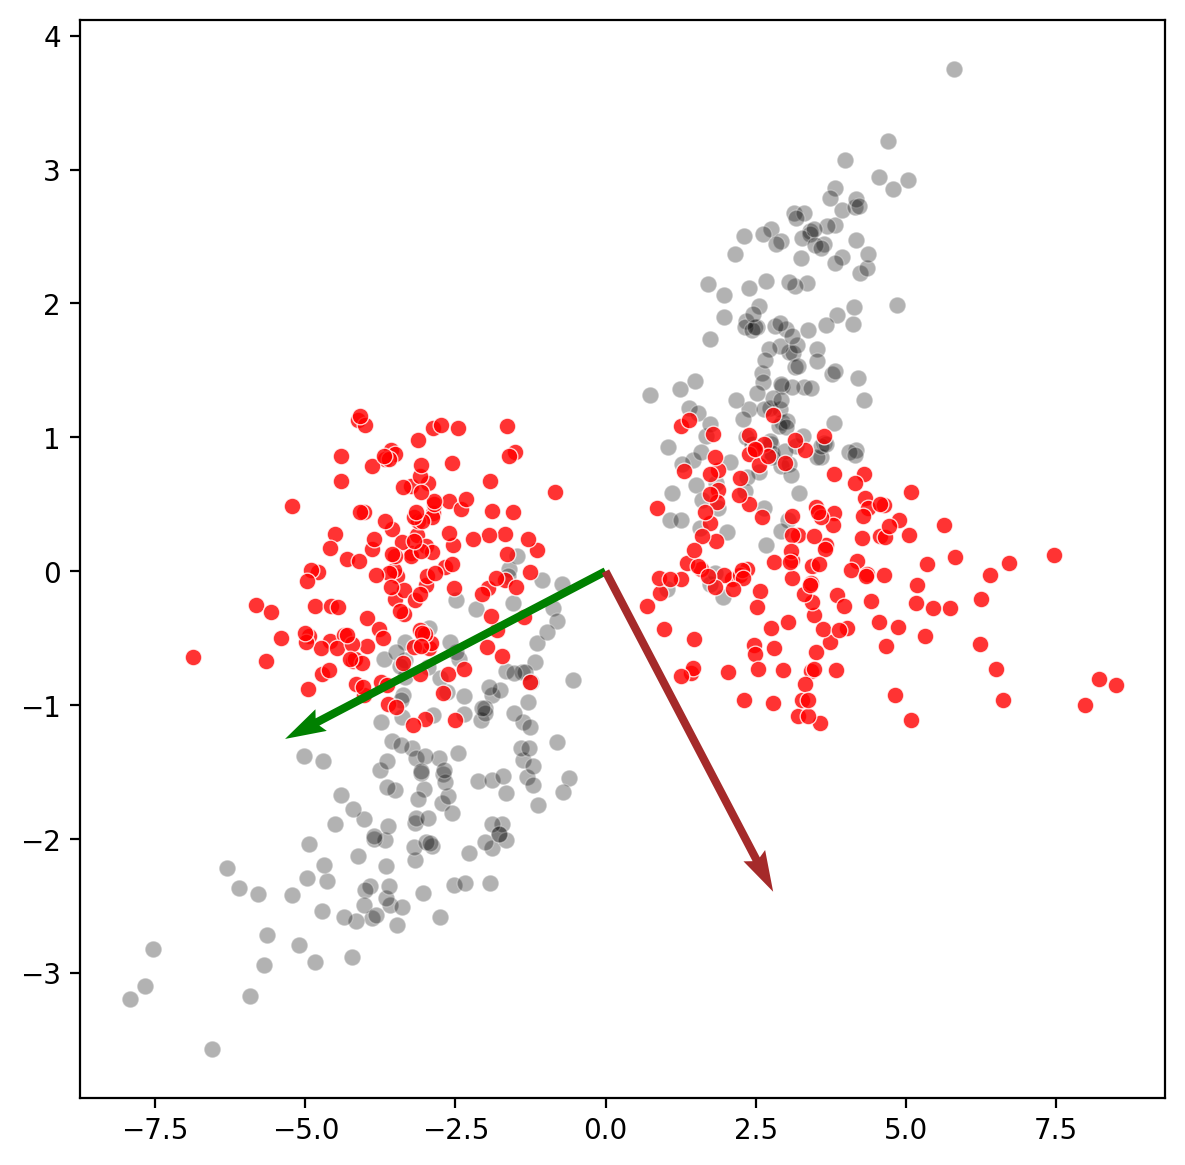

In [109]:
km_PCA = KMeans(n_clusters=2, n_init=10, random_state=1)
km_PCA.fit(PCscore)
y_PCA_km = km_PCA.labels_

color_code = {0:'orange', 1:'skyblue'}

plt.figure(figsize=(7,7))

sns.scatterplot(x=mX[:,0], y=mX[:,1], c='k', alpha=0.3)
sns.scatterplot(x=PCscore[:,0], y=PCscore[:,1], c='r', alpha=0.8)
origin = (0,0)
plt.quiver(*origin, eigen_v[0,0], eigen_v[1,0], color='g', scale=3)
plt.quiver(*origin, eigen_v[0,1], eigen_v[1,1], color='brown', scale=3)
plt.show()

### Dimensionality Reduction

In [112]:
pca.explained_variance_ratio_.shape

(2,)

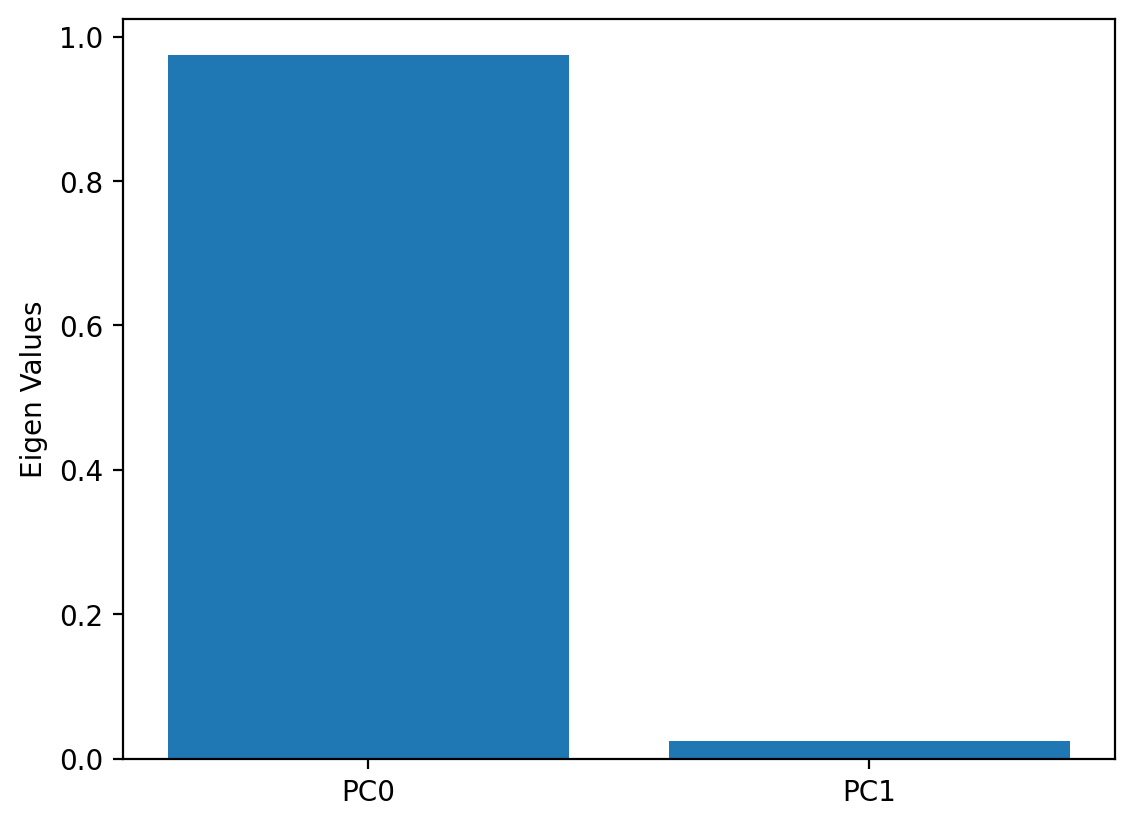

In [120]:
label = [f'PC{i}' for i in range(2)]
index = np.arange(len(label))
plt.bar(index, pca.explained_variance_ratio_)
plt.ylabel('Eigen Values')
plt.xticks(range(2), label)
plt.show()

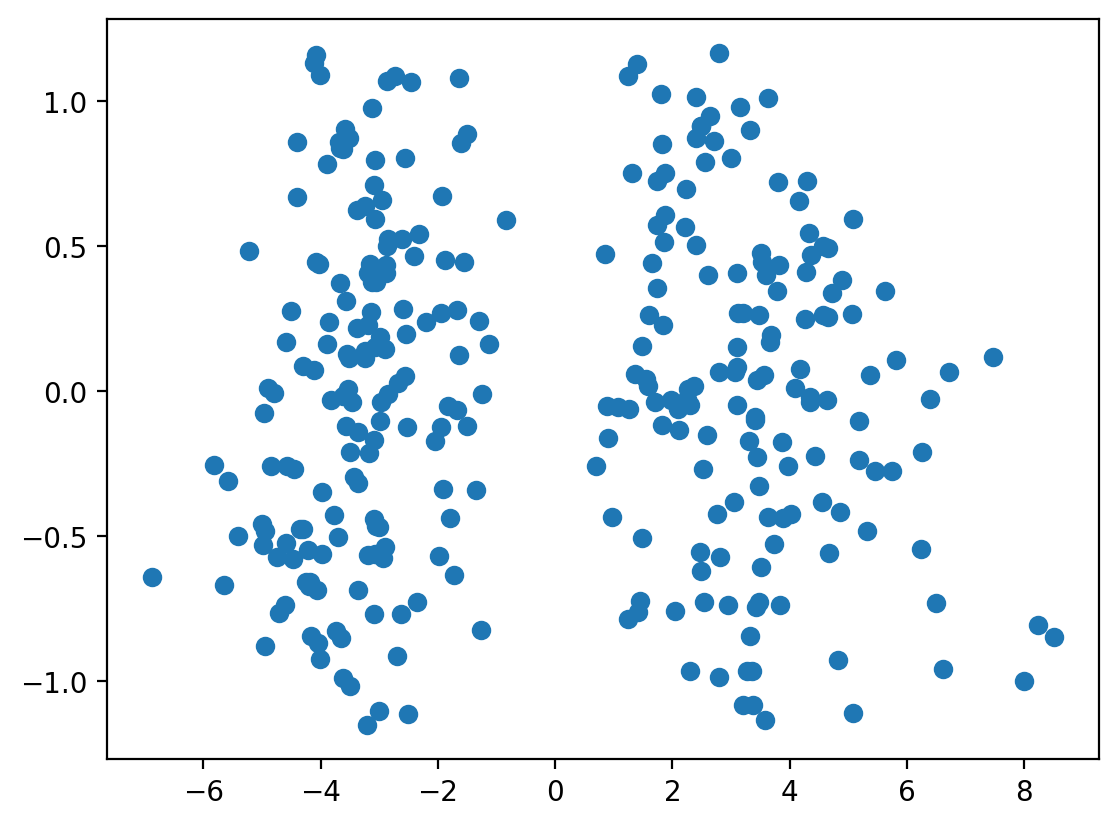

In [122]:
plt.scatter(PCscore[:,0], PCscore[:,1])
plt.show()

In [129]:
PCscore[:,0].reshape(1,-1).shape

(1, 300)

In [130]:
PCscore[:,0].T.shape

(300,)

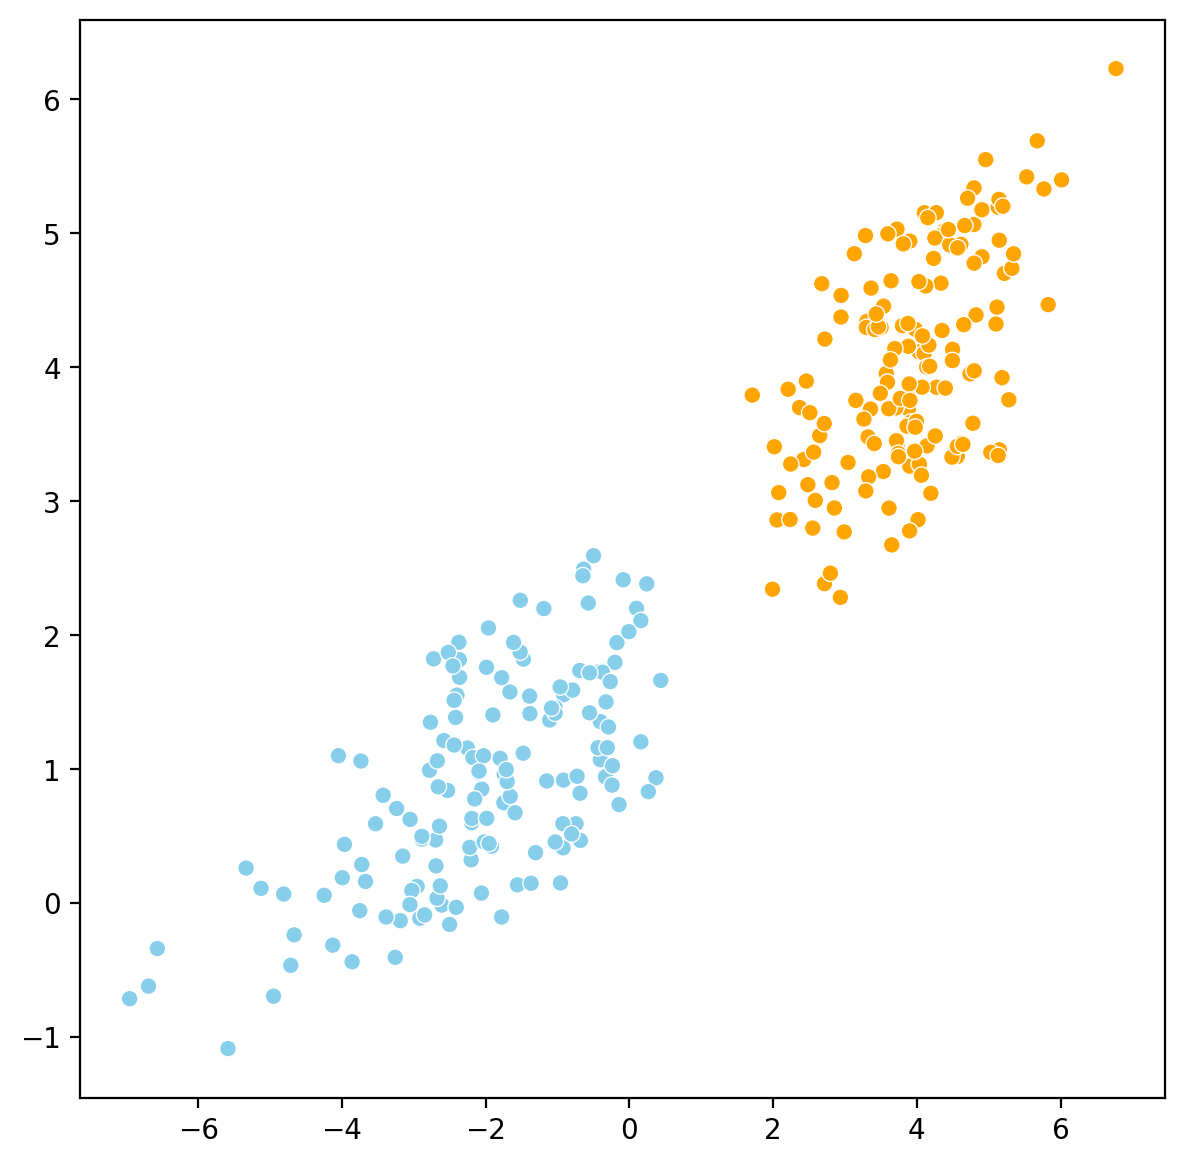

In [131]:
km_PCA2 = KMeans(n_clusters=2, n_init=10, random_state=1)
km_PCA2.fit(PCscore[:,0].reshape(-1,1))
y_PCA2_km = km_PCA2.labels_

plt.figure(figsize=(7,7))
sns.scatterplot(x=X_1[:,0], y=X_1[:,1], c=[color_code.get(i) for i in y_PCA2_km])
plt.show()